# 2020 Final Exam

## Imports

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from arch.univariate import GARCH, EWMAVariance 
from sklearn import linear_model
from numpy.linalg import inv
import scipy
import scipy.stats as stats
from statsmodels.regression.rolling import RollingOLS
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)
sns.set(rc={'figure.figsize':(15, 10)})

## Data

In [162]:
gmo = pd.read_excel('../data/grantham_data.xlsx').set_index('DATE')

gmo.head()

,RF,MKT,GMWAX
DATE,,,
1948-01-31,0.0008,-0.0445,NaN
1948-02-29,0.0008,0.0192,NaN
1948-03-31,0.0008,0.0819,NaN
1948-04-30,0.0008,0.0533,NaN
1948-05-31,0.0008,0.0459,NaN


In [163]:
EP = pd.read_excel('../data/grantham_data.xlsx',sheet_name=1)
EP.columns = ['DATE', 'EP']
EP = EP.set_index('DATE')

EP.head()

,EP
DATE,
1948-01-31,0.1108
1948-02-29,0.1189
1948-03-31,0.1196
1948-04-30,0.1143
1948-05-31,0.1121


# 1 True / False (30pts)

You are graded for your (brief) explanation.

1. (5pts) Cumulative returns are less risky for longer horizons.

<span style="color:#00008B"> **Solution: False.** The longer the horizon, the higher the variance of cumulative returns. That's why cumulative returns are more risky for longer horizons. </span>

2. (5pts) In the course, we derived mathematically that high dividend-price ratios must lead to
high future returns.

<span style="color:#00008B"> **Solution: False.** Mathematically, we saw high dividend price ratios could lead to high future returns, low future dividends, or something else. The fact that they seem to lead to high future returns is an empirical statistical fact, not a mathematical necessity. </span>

3. (5pts) From class and homework, we saw that the dividend-price ratio forecasts returns but that
the earnings-price ratio does not.

<span style="color:#00008B"> **Solution: False.** Dividend-price ratio as well as earnings-price ratio forecast returns.</span>

4. (5pts) The Expectations Hypothesis assumes that there is only one priced risk: interest-rate
risk.

<span style="color:#00008B"> **Solution: True.** As expectations Hypothesis assumes that the various maturities are perfect substitutes and suggests that the shape of the yield curve depends on market participants' expectations of future interest rates. </span>

5. (5pts) Empirically, we found that a positive Euro-USD spread in interest rates predicts depreciation
in the USD, relative to the Euro.

<span style="color:#00008B"> **Solution: False.** It was shown that uncovered interest parity does NOT hold. In fact, using FX spreads as a predictor leads to excess returns as the currency does not depreciate away the interest rate gains. </span>

6. (5pts) Statistically, replicating a target with instruments is the same as hedging a target with
instruments.

<span style="color:#00008B"> **Solution: True.** The difference between the replication and hedge is in "sign" of the position. </span>

# 2 Short Answer (40pts)

1. (5pts) We often annualize means by $h$ and volatilities by $\sqrt{h}$, where $h$ is the number of periods
in the year. Under what assumptions are these scalings mathematically correct?

<span style="color:#00008B"> **Solution:** This scaling holds true if we are examining LOG returns which are IID. In practice, the approximation tends to work well so long as the return series autocorrelation is nearly zero. </span>

2. (5pts) What features of dividend-price and earnings-price ratios make GMO believe that these
signals perform better in long-run compared to the short-run?

<span style="color:#00008B"> **Solution:** The high serial correlation in dividend-price and earnings-price ratios maeks GMO believe that their predictive power is stronger over long-run horizons. </span>

3. (5pts) In the case, does GMO believe the equity premium will continue to be high? Why or why
not?

<span style="color:#00008B"> **Solution:** The case shows that the price-dividend and price-earning ratios are much higher than their historic average. This decades-long rise in prices-per-cashflow increased returns, but there seems to be little room for further gains in P/D and P/E ratios. Accordingly, they believe the equity premium will not be as high as it had been historically. </span>

4. (5pts) In what sense is GMO's strategy contrarian? Be specific.

<span style="color:#00008B"> **Solution:** GMO is, in a macro sense, a value investor. They invest in asset classes with low prices per cash flow. This means that they are buying into depressed assets and missing out on assets with large run-ups in price. The case mentions that as GMO missed the bull market
of the late 1990`s, they experienced large withdrawals before ultimately being proven right
in the crash of 2000-2001.</span>

5. (5pts) Barnstable's view is that stocks outperform over the long-run, but their trading strategy
was not implemented well. Name one way in which their strategy did not directly trade on their
hypothesis. (The case considered two possible implementations; you are welcome to critique
either one.)

<span style="color:#00008B"> **Solution:** There are multiple things to say here. The most obvious is that they benchmarked the strategy to a constant 6% per year. While this was the average risk-free rate over previous decades, the risk-free rate was much lower going forward. Accordingly, Barnstable was actually betting on the level of stock return performance, not just that they would outperform the risk-free rate. 
    
<span style="color:#00008B"> A second notable problem is the Trust strategy. Barnstable would essentially sell all exposure to stock underperformance and retain exposure to overperformance. This is strange given that they believe the probability of stock under-performance is nearly zero over 30 years. So why are they giving up returns to sell off this risk exposure which they believe is so small?</span>

6. (5pts) Let $\tilde{r}^{(3)}_{t+1}$ denote one-year excess returns on 3-year treasury bonds. Denote forward spreads as, $f_t^{(3)} - y_t^{(1)} $. Consider the regression,

$$ \tilde{r}_{t+1}^{(3)} = \alpha + \beta ( f_t^{(3)} - y_t^{(1)} ) + \epsilon_{t+1} $$

If the expectations hypothesis were true, what could we say about $\alpha$, $\beta$ and/or the $R$-squared?

<span style="color:#00008B"> **Solution:** R-squared and Beta would be zero. Alpha would be zero in the strong version of the hypothesis and relaxed to be non-zero in the weaker version.</span>

7. (5pts) Which model holds better: Covered Interest Parity or Uncovered Interest Parity? Briefly explain why.

<span style="color:#00008B"> **Solution:** CIP holds better as it is driven by law of one price or no arbitrage priciple, whereas UIP is just a theory about which risks are priced.</span>

8. (5pts) Given the small serial correlation in stock returns, what were two features needed to make
the momentum strategy work?

<span style="color:#00008B"> **Solution:** 1. Betting on large number of outperformer and underperformer. 2. Bet on extreme outperformer and underperformer</span>

## 3 Returns Over Time

## 3.1

In [164]:
def summary_stats(df, annual_fac=12):
    stat_df = (df.mean()*annual_fac).to_frame('Mean')
    stat_df['Vol'] = df.std()*np.sqrt(annual_fac)
    stat_df['Sharpe'] = stat_df['Mean']/stat_df['Vol']
    
    return stat_df

def p(h, tilde_mu, tilde_sigma):
    x = - np.sqrt(h) * tilde_mu / tilde_sigma
    val = scipy.stats.norm.cdf(x)
    return val[0]

def regress(y, X, intercept = True, annual_fac=12):
    if intercept == True:
        X_ = sm.add_constant(X)
        reg = sm.OLS(y, X_).fit()
        reg_df = reg.params.to_frame('Regression Parameters')
        reg_df.loc[r'$R^{2}$'] = reg.rsquared
        reg_df.loc['const'] *= annual_fac
    else:
        reg = sm.OLS(y, X).fit()
        reg_df = reg.params.to_frame('Regression Parameters')
        reg_df.loc[r'$R^{2}$'] = reg.rsquared
    
    return reg_df

(a)

In [165]:
gmo_ = gmo.dropna()

r_star = (gmo_['MKT'] - gmo_['GMWAX']).to_frame(r'$r^{*}$')

stats_df = summary_stats(r_star)

stats_df

,Mean,Vol,Sharpe
$r^{*}$,0.0217,0.1233,0.1764


(b)

In [166]:
r_star_log = (np.log(1 + gmo_['MKT']) - np.log(1 + gmo_['GMWAX'])).to_frame(r'$r^{*}$').dropna()

stats_df_log = summary_stats(r_star_log)

stats_df_log

,Mean,Vol,Sharpe
$r^{*}$,0.0174,0.1252,0.139


In [167]:
p(20, stats_df_log['Mean'], stats_df_log['Vol'])

0.26712401586166784

## 3.2

(a)

In [168]:
r_star['EP'] = EP['EP']
r_star['EP shift'] = r_star['EP'].shift(1)

r_star_shift = r_star.dropna()

y = r_star_shift[r'$r^{*}$']
X = sm.add_constant(r_star_shift['EP shift'])

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                $r^{*}$   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.900
Date:                Mon, 06 Dec 2021   Prob (F-statistic):              0.169
Time:                        12:35:25   Log-Likelihood:                 551.62
No. Observations:                 287   AIC:                            -1099.
Df Residuals:                     285   BIC:                            -1092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0083      0.008     -1.075      0.283      -0.023       0.007
EP shift       0.2288      0.166      1.378      0.169      -0.098       0.555
==============================================================================
Omnibus:                       23.127   Durbin-Watson:                   2.324
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.482
Skew:                          -0.247   Prob(JB):                     4.96e-16
Kurtosis:                       5.377   Cond. No.                         79.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [169]:
reg_params = regress(y, X, annual_fac=1)

reg_params

,Regression Parameters
const,-0.0083
EP shift,0.2288
$R^{2}$,0.0066


<span style="color:#00008B"> **Q3.2(b):**</span> 

<span style="color:#00008B"> As we can see from above, $R^2$ is small and $\beta$ is not statistically significant ($p-value = 0.169$). That's why we can conclude that it's not a very useful strategy.</span>

<span style="color:#00008B">In order to conclude that the strategy works well, we would expect to see a high $R^2$ and a statistically significant $\beta$.</span>

(c)

In [170]:
r_star_pred = (reg_params.loc['const'][0] + (reg_params.loc['EP shift'][0] * r_star['EP'])).to_frame(r'$E[r^{*}]$')

r_star_pred.head()

,$E[r^{*}]$
DATE,
1996-11-30,0.0035
1996-12-31,0.0036
1997-01-31,0.0034
1997-02-28,0.0031
1997-03-31,0.0033


In [171]:
r_star_pred.nsmallest(1, [r'$E[r^{*}]$'])

,$E[r^{*}]$
DATE,
2009-05-31,-0.0064


In [172]:
r_star_pred.nlargest(1, [r'$E[r^{*}]$'])

,$E[r^{*}]$
DATE,
2011-09-30,0.0087


In [173]:
r_star_pred.mean().to_frame('Mean')

,Mean
$E[r^{*}]$,0.0019


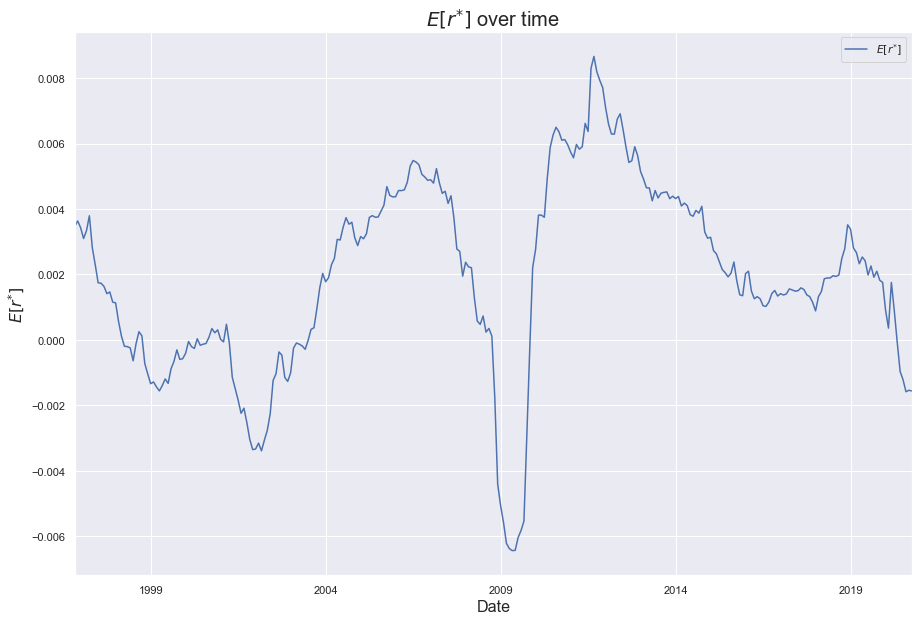

In [174]:
r_star_pred.plot()
plt.xlabel('Date', size = 16)
plt.ylabel(r'$E[r^{*}]$', size = 16)
plt.title(r'$E[r^{*}]$ over time', size = 20)
plt.show()

(d)

In [175]:
weights = (r_star_pred[r'$E[r^{*}]$'] / (4 * r_star[r'$r^{*}$'].var())).shift(1).to_frame(r'$w_{t}$')

weights.head()

,$w_{t}$
DATE,
1996-11-30,NaN
1996-12-31,0.6861
1997-01-31,0.7177
1997-02-28,0.6768
1997-03-31,0.6121


In [176]:
weights.nsmallest(1, [r'$w_{t}$'])

,$w_{t}$
DATE,
2009-06-30,-1.2711


In [177]:
weights.nlargest(1, [r'$w_{t}$'])

,$w_{t}$
DATE,
2011-10-31,1.7109


In [178]:
weights.mean().to_frame('Mean')

,Mean
$w_{t}$,0.3818


(e)

In [179]:
r_dynamic = (weights[r'$w_{t}$'] * r_star[r'$r^{*}$']).to_frame(r'$r^{dynamic}$').dropna()

r_dynamic.head()

,$r^{dynamic}$
DATE,
1996-12-31,0.0375
1997-01-31,0.0207
1997-02-28,-0.0193
1997-03-31,-0.0116
1997-04-30,0.0651


In [180]:
summary_stats(r_dynamic)

,Mean,Vol,Sharpe
$r^{dynamic}$,0.0287,0.0768,0.3734


(f)

In [181]:
stats_df.append(summary_stats(r_dynamic))

,Mean,Vol,Sharpe
$r^{*}$,0.0217,0.1233,0.1764
$r^{dynamic}$,0.0287,0.0768,0.3734


## 4 Risk

In [182]:
gmo_['gmo excess'] = gmo_['GMWAX'].subtract(gmo_['RF'])

gmo_.head()

,RF,MKT,GMWAX,gmo excess
DATE,,,,
1996-11-30,0.0042,0.0120,0.0452,0.0410
1996-12-31,0.0041,0.0326,-0.0221,-0.0262
1997-01-31,0.0042,0.0436,0.0147,0.0105
1997-02-28,0.0042,-0.0062,0.0223,0.0181
1997-03-31,0.0043,-0.0340,-0.0152,-0.0194


(a)

In [183]:
gmo_['gmo excess'].quantile(.05)

-0.04163335024846228

(b)

In [184]:
gmo_['gmo excess'].var()

0.0008612497600674487

In [185]:
gmo_['gmo excess'].std()

0.029347057093811788

(c)

In [186]:
(gmo_['gmo excess'].quantile(.05) - gmo_['gmo excess'].mean()) / gmo_['gmo excess'].std()

-1.5548963395008706

## 4.2

(b) (5pts) Calculate the 5th percentile, 1-day-ahead VaR using simplified formula:

VaR = −1.65σt

Compare this to the unconditional VaR calculated at the start of this problem.

## 4.3

In [187]:
ret_ex = gmo_[['MKT','GMWAX']].subtract(gmo_['RF'], axis = 0)

ret_ex.head()

,MKT,GMWAX
DATE,,
1996-11-30,0.0078,0.0410
1996-12-31,0.0285,-0.0262
1997-01-31,0.0394,0.0105
1997-02-28,-0.0104,0.0181
1997-03-31,-0.0383,-0.0194


(a)

In [188]:
mu_tilde = ret_ex.mean() * 12
std = ret_ex.std() * np.sqrt(12)
Sigma = ret_ex.cov() * 12
Sigma_inv = inv(Sigma)
N = Sigma.shape[0]

weights_t = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

In [189]:
pd.DataFrame(weights_t, index=ret_ex.columns, columns=['Weights of tangency portfolio'])

,Weights of tangency portfolio
MKT,0.4853
GMWAX,0.5147


(b)

In [190]:
tang_df = (ret_ex @ weights_t).to_frame('Tangency portfolio')

summary_stats(tang_df)

,Mean,Vol,Sharpe
Tangency portfolio,0.0585,0.1028,0.5694


(c)

Expected return and covariances used in sample might not hold true for out of sample, so tangency weight will not be same.